# 10. OLS, RIDGE and LASSO with SGD by ScikitLearn
# DATA SET PREPROCESSING

## 0 . Necessary Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import math

## 1. Regression Data Sets

### a ) Generate $D_1$

#### a i) Initialize Matrix X

First, we will generate a $100x1$ matrix which is normally distributed.

In [2]:
#creating the normally distributed data set 
mu =1
sigma = 0.05
random.seed(3116)
X = (np.random.normal(mu, sigma, 100)).reshape((100,1))

#checking the shape
print(X.shape)

(100, 1)


#### a ii)  Generate Matrix Y

Nowm we will generate target y which is $100x1$ matrix and satisfies

$ \begin{equation}
y = 1.3 x^2 + 4,8x + 8 +\psi
\end{equation}$

For this reason first we have to generate $\psi$.

##### Generating $\psi$

In [3]:
random.seed(3116)
psi = np.random.rand(100,1)

##### Generating Y

In [4]:
one_vector = np.ones((100,1)) 

In [5]:
Y= 1.3 * (X**2) + 4.8 * X + 8 * one_vector + psi

In [6]:
Y.shape

(100, 1)

### b) $D_2$ Dataset

In [7]:
wine_quality = pd.read_csv('winequality-red.csv', sep=';')

In [8]:
wine_quality

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# EXERCISE 1
# GLM WITH SCIKIT LEARN

##  0. IMPORTING THE LIBRARIES

In [9]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

## 1. TRAIN AND TEST SETS

### 1.1 Train and Test Sets: $D_1$ 

In [10]:
#adding a one vector for bias
x =np.hstack((X,one_vector))

#creating train set
d_one_train_x = x[:80]
d_one_train_y =Y[:80]

#creating test set
d_one_test_x = x[80:100]
d_one_test_y =Y[80:100]


### 1.2 Train and Test Sets: $D_2$

In [11]:
ratio =math.floor(int(wine_quality.shape[0])*0.8)

In [12]:
d_two_train = wine_quality.iloc[:ratio,:]
d_two_test= wine_quality.iloc[ratio:,:]

In [13]:
d_two_train_x = np.array(d_two_train.iloc[:,:11])
d_two_train_y = np.ravel(np.array(d_two_train.iloc[:,11:12]))

d_two_test_x = np.array(d_two_test.iloc[:,:11])
d_two_test_y =np.array( d_two_test.iloc[:,11:])


#  MODEL 1: ORDINARY LEAST SQUARES

## 1. OLS: Hyperparameter Tuning Manually

### OLS: Hyperparameter  1 : learning rate =0.000001, number of iteration=50

In [14]:
#learning rate=0.000001 number of iteration =50
reg_one = linear_model.SGDRegressor(loss='squared_loss', alpha=0,max_iter=50,learning_rate='constant',eta0=0.000001)
reg_one.fit(d_two_train_x,d_two_train_y)


#predicted y values
predicted_wine_quality = reg_one.predict(d_two_test_x)


#mse error
rmse_wine =mean_squared_error(d_two_test_y,predicted_wine_quality,squared=False)



C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [15]:
#rmse
print('RMSE for Wine Quality Data Set:\n',rmse_wine)

RMSE for Wine Quality Data Set:
 0.7568611137174875


In [16]:
rmse_one_train =[]
rmse_one_test=[]
for i in range(0,50):
    reg_one = linear_model.SGDRegressor(loss='squared_loss', alpha=0,max_iter=i+1,learning_rate='constant',eta0=0.000001)
    reg_one.fit(d_two_train_x,d_two_train_y)
    predicted_wine_quality_test = reg_one.predict(d_two_test_x)
    predicted_wine_quality_train = reg_one.predict(d_two_train_x)
    rmse_wine_test =mean_squared_error(d_two_test_y,predicted_wine_quality_test,squared=False)
    rmse_wine_train =mean_squared_error(d_two_train_y,predicted_wine_quality_train,squared=False)
    rmse_one_train.append(rmse_wine_train)
    rmse_one_test.append(rmse_wine_test)

C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of itera

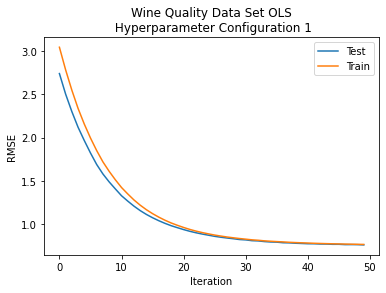

In [17]:
plt.title('Wine Quality Data Set OLS\n Hyperparameter Configuration 1')
plt.plot(rmse_one_test, label='Test')
plt.plot(rmse_one_train, label = 'Train')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.legend()
plt.show()

 ### OLS: Hyperparameter 2 : learning rate =0.000009, number of iteration=50

In [18]:
#learning rate=0.000009, number of iteration=1000
reg_two = linear_model.SGDRegressor(loss='squared_loss', alpha=0,max_iter=50,learning_rate='constant',eta0=0.000009)
reg_two.fit(d_two_train_x,d_two_train_y)


#predicted y values
predicted_wine_quality_two = reg_two.predict(d_two_test_x)


#mse error
rmse_wine_two =mean_squared_error(d_two_test_y,predicted_wine_quality_two,squared=False)

#rmse
print('RMSE for Wine Quality Data Set:\n',rmse_wine_two )


RMSE for Wine Quality Data Set:
 0.7175958831116794


In [19]:
rmse_two_train =[]
rmse_two_test=[]
for i in range(0,50):
    reg_two = linear_model.SGDRegressor(loss='squared_loss', alpha=0,max_iter=i+1,learning_rate='constant',eta0=0.000009)
    reg_two.fit(d_two_train_x,d_two_train_y)
    predicted_wine_quality_test = reg_two.predict(d_two_test_x)
    predicted_wine_quality_train = reg_two.predict(d_two_train_x)
    rmse_wine_test =mean_squared_error(d_two_test_y,predicted_wine_quality_test,squared=False)
    rmse_wine_train =mean_squared_error(d_two_train_y,predicted_wine_quality_train,squared=False)
    rmse_two_train.append(rmse_wine_train)
    rmse_two_test.append(rmse_wine_test)

C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of itera

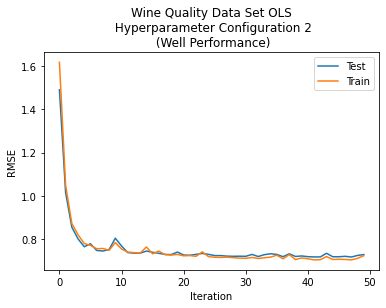

In [20]:
plt.title('Wine Quality Data Set OLS\n Hyperparameter Configuration 2\n (Well Performance)')
plt.plot(rmse_two_test ,label='Test')
plt.plot(rmse_two_train,label='Train')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.legend()
plt.show()

###  OLS: Hyperparameter 3 : learning rate =0.009, number of iteration=1000

In [21]:
#learning rate=0.01
reg_two = linear_model.SGDRegressor(loss='squared_loss', alpha=0,max_iter=1000,learning_rate='constant',eta0=0.09)
reg_two.fit(d_two_train_x,d_two_train_y)


#predicted y values
predicted_wine_quality_two = reg_two.predict(d_two_test_x)


#mse error
rmse_wine_three =mean_squared_error(d_two_test_y,predicted_wine_quality_two,squared=False)

#rmse
print('RMSE for Wine Quality Data Set:\n',rmse_wine_three)



RMSE for Wine Quality Data Set:
 207933002425470.4


In [22]:
rmse_three_train =[]
rmse_three_test=[]
for i in range(0,1000):
    reg_three = linear_model.SGDRegressor(loss='squared_loss', alpha=0,max_iter=i+1,learning_rate='constant',eta0=0.09)
    reg_three.fit(d_two_train_x,d_two_train_y)
    predicted_wine_quality_test = reg_three.predict(d_two_test_x)
    predicted_wine_quality_train = reg_three.predict(d_two_train_x)
    rmse_wine_test =mean_squared_error(d_two_test_y,predicted_wine_quality_test,squared=False)
    rmse_wine_train =mean_squared_error(d_two_train_y,predicted_wine_quality_train,squared=False)
    rmse_three_train.append(rmse_wine_train)
    rmse_three_test.append(rmse_wine_test)

C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of itera

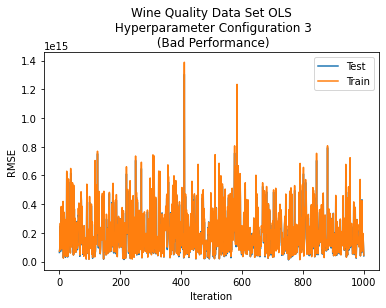

In [23]:
plt.title('Wine Quality Data Set OLS\n Hyperparameter Configuration 3\n (Bad Performance)')
plt.plot(rmse_three_test,label='Test')
plt.plot(rmse_three_train, label='Train')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.legend()
plt.show()

### OLS: Hyperparameter Tuning Manually: Conclusion

In [24]:
over_all_errors = [rmse_wine,rmse_wine_two,rmse_wine_three]
over_all_errors

[0.7568611137174875, 0.7175958831116794, 207933002425470.4]

According to results, the best configuration is Configuration 2.

### OLS: Table of Results Hyperparameter Tuning Manually 

In [25]:
rmse_table=pd.DataFrame({'RMSE(OLS)':over_all_errors},index=['Configuration 1','Configuration 2','Configuration 3'])
rmse_table

,RMSE(OLS)
Configuration 1,7.568611e-01
Configuration 2,7.175959e-01
Configuration 3,2.079330e+14


## OLS: Relationship Between RMSE and Learning Rate

In [343]:
rmse_vs_lr_test=[]
rmse_vs_lr_train=[]
interval = np.arange(0.0001,0.01,0.001)
for i in interval:
    reg_one = linear_model.SGDRegressor(loss='squared_loss', alpha=0,max_iter=100,learning_rate='constant',eta0=i)
    reg_one.fit(d_two_train_x,d_two_train_y)
    #predicted y values
    predicted_wine_quality_test = reg_one.predict(d_two_test_x)
    #mse error
    rmse_wine_test =mean_squared_error(d_two_test_y,predicted_wine_quality_test,squared=False)
    rmse_vs_lr_test.append(rmse_wine_test) 
    predicted_wine_quality_train = reg_one.predict(d_two_train_x)
    rmse_wine_train =mean_squared_error(d_two_train_y,predicted_wine_quality_train,squared=False)
    rmse_vs_lr_train.append(rmse_wine_train)

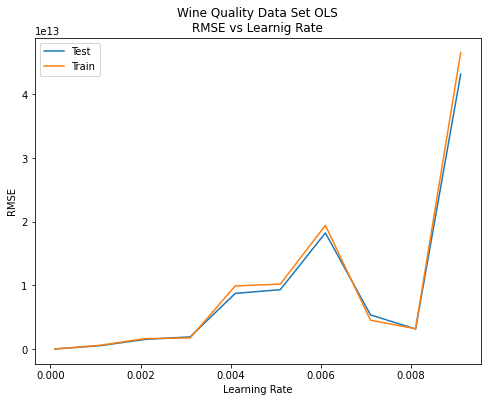

In [347]:
plt.figure(figsize=(8,6)) 
plt.title('Wine Quality Data Set OLS\nRMSE vs Learnig Rate')
plt.plot(interval,rmse_vs_lr_test,label='Test')
plt.plot(interval,rmse_vs_lr_train,label='Train')
plt.xlabel('Learning Rate')
plt.ylabel('RMSE')
plt.legend()
plt.show()

## 2. OLS: GridSearchCV

### 2.1 OLS  Finding the Parameters

In [26]:
#learning the parameters
reg_one.get_params()

{'alpha': 0,
 'average': False,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 1e-06,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'constant',
 'loss': 'squared_loss',
 'max_iter': 50,
 'n_iter_no_change': 5,
 'penalty': 'l2',
 'power_t': 0.25,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

### 2.2 OLS: Applying the GridSearchCV

In [27]:
#learning rate=0.000009, number of iteration=1000
reg_grid= linear_model.SGDRegressor(loss='squared_loss', alpha=0,max_iter=50,learning_rate='constant',eta0=0.000009)

#setting the parameters to try
parameters={'eta0':[0.000001,0.000009,0.09]}
clf =GridSearchCV(reg_grid,parameters)
clf.fit(d_two_train_x,d_two_train_y)

C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of itera

GridSearchCV(estimator=SGDRegressor(alpha=0, eta0=9e-06,
                                    learning_rate='constant', max_iter=50),
             param_grid={'eta0': [1e-06, 9e-06, 0.09]})

### 2.3 OLS: Best Configuration by GridSearch

In [28]:
#calling the best hyperparameter configuration
clf.best_estimator_

SGDRegressor(alpha=0, eta0=9e-06, learning_rate='constant', max_iter=50)

Best configuration, like we found manually, second configuration.

### 2.4 OLS: Table of Results for GridSearch

In [29]:
grid_cv_table = pd.DataFrame(clf.cv_results_)
grid_cv_table

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_eta0,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008799,0.001722,0.008202,1.390562e-02,1e-06,{'eta0': 1e-06},-4.756816e-02,3.084533e-02,-4.211736e-01,1.266797e-01,4.459695e-03,-6.135141e-02,1.885996e-01,2
1,0.012198,0.009867,0.001202,4.005916e-04,9e-06,{'eta0': 9e-06},7.653261e-02,1.859207e-01,-5.749457e-01,3.321546e-01,2.141258e-01,4.675760e-02,3.213196e-01,1
2,0.002600,0.000798,0.000999,8.064048e-07,0.09,{'eta0': 0.09},-2.550638e+28,-1.455885e+27,-2.921406e+28,-3.941974e+28,-3.674866e+28,-2.646894e+28,1.347228e+28,3


In [30]:
clf.cv_results_['mean_test_score']

array([-6.13514119e-02,  4.67576015e-02, -2.64689444e+28])

### 2.5 OLS: Table of the Mean Test Scores CV of 3 Configuration

In [31]:
cv_for_3_conf=[]
for i in range(0,50):
    #learning rate=0.000009, number of iteration=1000
    reg_grid_cv= linear_model.SGDRegressor(loss='squared_loss', alpha=0,max_iter=i+1,learning_rate='constant',eta0=0.000009)
    #setting the parameters to try
    parameters={'eta0':[0.000001,0.000009,0.09]}
    exm =GridSearchCV(reg_grid_cv,parameters)
    exm.fit(d_two_train_x,d_two_train_y)
    cv_for_3_conf.append(exm.cv_results_['mean_test_score'])

C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of itera

In [32]:
table_of_cv_for_3_conf=pd.DataFrame(cv_for_3_conf, columns=['Config 1','Config 2','Config 3'])

In [33]:
index = table_of_cv_for_3_conf.index
index.name = 'Iteration'

In [34]:
table_of_cv_for_3_conf

,Config 1,Config 2,Config 3
Iteration,,,
0,-15.632294,-4.973618,-8.262711e+29
1,-13.332693,-1.472467,-2.014339e+29
2,-11.390281,-0.589123,-1.518469e+28
3,-9.802400,-0.276540,-2.296913e+29
4,-8.488827,-0.143844,-2.688635e+29
5,-7.241367,-0.028778,-1.120659e+29
6,-6.309017,-0.010222,-7.437036e+28
7,-5.425590,0.014197,-1.248742e+29
8,-4.695268,0.023937,-3.652042e+29


### OLS: 2.6 Plotting  CV Mean Score

### OLS with Cross Validation: Hyperparameter 1

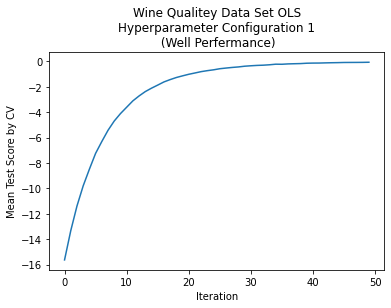

In [35]:
plt.title('Wine Qualitey Data Set OLS\nHyperparameter Configuration 1\n (Well Perfermance)')
plt.plot(np.array(table_of_cv_for_3_conf['Config 1']))
plt.xlabel('Iteration')
plt.ylabel('Mean Test Score by CV')
plt.show()

### OLS with Cross Validation: Hyperparameter 2

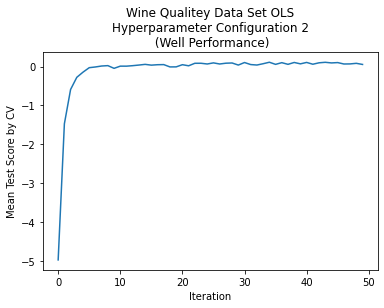

In [36]:
plt.title('Wine Qualitey Data Set OLS\nHyperparameter Configuration 2\n (Well Performance)')
plt.plot(np.array(table_of_cv_for_3_conf['Config 2']))
plt.xlabel('Iteration')
plt.ylabel('Mean Test Score by CV')
plt.show()

### OLS with Cross Validation: Hyperparameter 3

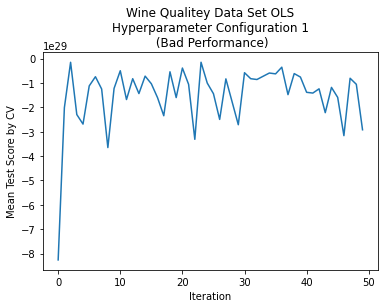

In [37]:
plt.title('Wine Qualitey Data Set OLS\nHyperparameter Configuration 1\n (Bad Performance)')
plt.plot(np.array(table_of_cv_for_3_conf['Config 3']))
plt.xlabel('Iteration')
plt.ylabel('Mean Test Score by CV')
plt.show()

## 3. OLS: Best Hyperparameter

In both cases, manually and by using GridSearchCV, we found that second Hyperparameter configuration $eta0=0.000009$ is has the best perfermance. If we repeat what we did, we can evaluate the model on the test set. 

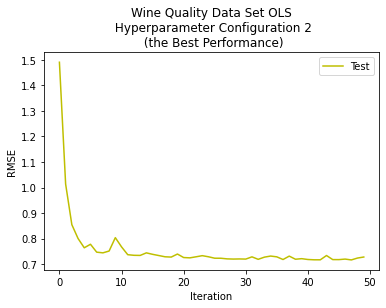

In [38]:
plt.title('Wine Quality Data Set OLS\n Hyperparameter Configuration 2\n (the Best Performance)')
plt.plot(rmse_two_test ,'y',label='Test')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.legend()
plt.show()

#  MODEL 2: RIDGE REGRESSION

## 1. RIDGE: Hyperparameter Tuning Manually

#### Ridge Regression Hyperparameter Set 1: alpha =0.01 , learning rate =0.00001

In [39]:
#learning rate=0.00001 number of iteration =50
ridge_one = linear_model.SGDRegressor(loss='squared_loss',penalty='l2' ,alpha=0.01,max_iter=50,learning_rate='constant',eta0=0.000001)
ridge_one.fit(d_two_train_x,d_two_train_y)


#predicted y values
predicted_wine_quality = ridge_one.predict(d_two_test_x)


#mse error
rmse_wine_ridge_one =mean_squared_error(d_two_test_y,predicted_wine_quality,squared=False)


C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [40]:
print('RMSE for Hyperparameter Configuration 1 by Ridge:\n ',rmse_wine_ridge_one)

RMSE for Hyperparameter Configuration 1 by Ridge:
  0.7573328827831066


In [41]:
rmse_ridge_one_train =[]
rmse_ridge_one_test=[]
for i in range(0,50):
    ridge_one = linear_model.SGDRegressor(loss='squared_loss',penalty='l2' ,alpha=0.01,max_iter=i+1,learning_rate='constant',eta0=0.000001)
    ridge_one.fit(d_two_train_x,d_two_train_y)
    predicted_wine_quality_test = ridge_one.predict(d_two_test_x)
    predicted_wine_quality_train = ridge_one.predict(d_two_train_x)
    rmse_wine_test =mean_squared_error(d_two_test_y,predicted_wine_quality_test,squared=False)
    rmse_wine_train =mean_squared_error(d_two_train_y,predicted_wine_quality_train,squared=False)
    rmse_ridge_one_train.append(rmse_wine_train)
    rmse_ridge_one_test.append(rmse_wine_test)

C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of itera

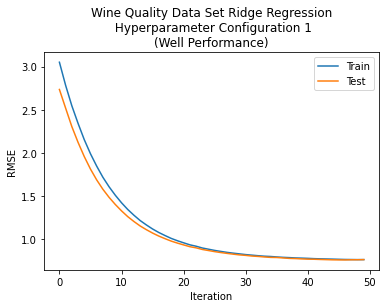

In [42]:
plt.title('Wine Quality Data Set Ridge Regression\n Hyperparameter Configuration 1\n(Well Performance)')
plt.plot(rmse_ridge_one_train,label='Train')
plt.plot(rmse_ridge_one_test,label='Test')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.legend()
plt.show()

#### Ridge Regression Hyperparameter Set 2: alpha =0.001 , learning rate =0.0001

In [43]:
#learning rate=0.00001 number of iteration =50
ridge_two = linear_model.SGDRegressor(loss='squared_loss',penalty='l2' ,alpha=0.9,max_iter=50,learning_rate='constant',eta0=0.0001)
ridge_two.fit(d_two_train_x,d_two_train_y)


#predicted y values
predicted_wine_quality_ridge_two = ridge_two.predict(d_two_test_x)


#mse error
rmse_wine_ridge_two =mean_squared_error(d_two_test_y,predicted_wine_quality_ridge_two,squared=False)


In [44]:
print('RMSE for Hyperparameter Configuration 2 by Ridge:\n ',rmse_wine_ridge_two)

RMSE for Hyperparameter Configuration 2 by Ridge:
  0.761014270794814


In [45]:
rmse_ridge_two_train =[]
rmse_ridge_two_test=[]
for i in range(0,50):
    ridge_two = linear_model.SGDRegressor(loss='squared_loss',penalty='l2' ,alpha=0.001,max_iter=i+1,learning_rate='constant',eta0=0.0001)
    ridge_two.fit(d_two_train_x,d_two_train_y)
    predicted_wine_quality_test = ridge_two.predict(d_two_test_x)
    predicted_wine_quality_train = ridge_two.predict(d_two_train_x)
    rmse_wine_test =mean_squared_error(d_two_test_y,predicted_wine_quality_test,squared=False)
    rmse_wine_train =mean_squared_error(d_two_train_y,predicted_wine_quality_train,squared=False)
    rmse_ridge_two_train.append(rmse_wine_train)
    rmse_ridge_two_test.append(rmse_wine_test)

C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of itera

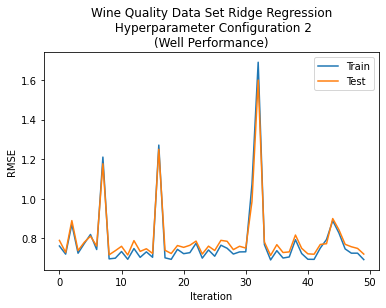

In [46]:
plt.title('Wine Quality Data Set Ridge Regression\n Hyperparameter Configuration 2\n(Well Performance)')
plt.plot(rmse_ridge_two_train,label='Train')
plt.plot(rmse_ridge_two_test,label='Test')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.legend()
plt.show()

#### Ridge Regression Hyperparameter Set 3: alpha =0.5 , learning rate =0.00001

In [47]:
#learning rate=0.00001 number of iteration =50
ridge_three = linear_model.SGDRegressor(loss='squared_loss',penalty='l2' ,alpha=0.5,max_iter=50,learning_rate='constant',eta0=0.00001)
ridge_three.fit(d_two_train_x,d_two_train_y)


#predicted y values
predicted_wine_quality_three = ridge_three.predict(d_two_test_x)


#mse error
rmse_wine_ridge_three =mean_squared_error(d_two_test_y,predicted_wine_quality_three,squared=False)


In [48]:
print('RMSE for Hyperparameter Configuration 3 by Ridge:\n ',rmse_wine_ridge_three)

RMSE for Hyperparameter Configuration 3 by Ridge:
  0.7158382743336515


In [49]:
rmse_ridge_three_train =[]
rmse_ridge_three_test=[]
for i in range(0,50):
    ridge_three = linear_model.SGDRegressor(loss='squared_loss',penalty='l2' ,alpha=0.001,max_iter=i+1,learning_rate='constant',eta0=0.0001)
    ridge_three.fit(d_two_train_x,d_two_train_y)
    predicted_wine_quality_test = ridge_three.predict(d_two_test_x)
    predicted_wine_quality_train = ridge_three.predict(d_two_train_x)
    rmse_wine_test =mean_squared_error(d_two_test_y,predicted_wine_quality_test,squared=False)
    rmse_wine_train =mean_squared_error(d_two_train_y,predicted_wine_quality_train,squared=False)
    rmse_ridge_three_train.append(rmse_wine_train)
    rmse_ridge_three_test.append(rmse_wine_test)

C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of itera

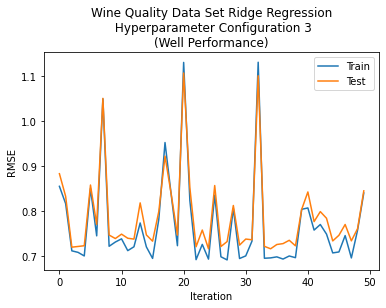

In [50]:
plt.title('Wine Quality Data Set Ridge Regression\n Hyperparameter Configuration 3\n(Well Performance)')
plt.plot(rmse_ridge_three_train,label='Train')
plt.plot(rmse_ridge_three_test,label='Test')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.legend()
plt.show()

### 2.1 RIDGE: Table of Results Hyperparameter Tuning Manually 

In [51]:
over_all_errors_ridge = [rmse_wine_ridge_one,rmse_wine_ridge_two,rmse_wine_ridge_three]
over_all_errors_ridge

[0.7573328827831066, 0.761014270794814, 0.7158382743336515]

In [52]:
rmse_table=pd.DataFrame({'RMSE(RIDGE)':over_all_errors_ridge},index=['Configuration 1','Configuration 2','Configuration 3'])
rmse_table

,RMSE(RIDGE)
Configuration 1,0.757333
Configuration 2,0.761014
Configuration 3,0.715838


## RIDGE: Relationsip RMSE and Hyperparameters

###  RIDGE: RMSE vs. Learning Rate (while alpha is fixed)

In [355]:
rmse_ridge_train =[]
rmse_ridge_test = []
#learning rate=0.00001 number of iteration =50

interval_ridge =np.arange(0,0.3,0.05)
for k in interval_ridge:
    ridge_three = linear_model.SGDRegressor(loss='squared_loss',penalty='l2' ,alpha=0.5,max_iter=50,learning_rate='constant',eta0=i)
    ridge_three.fit(d_two_train_x,d_two_train_y)

    #predicted y values
    predicted_wine_quality_test = ridge_three.predict(d_two_test_x)
    rmse_wine_ridge_test =mean_squared_error(d_two_test_y,predicted_wine_quality_test,squared=False)

    predicted_wine_quality_train = ridge_three.predict(d_two_train_x)
    rmse_wine_ridge_train =mean_squared_error(d_two_train_y,predicted_wine_quality_train,squared=False)
  
    rmse_ridge_train.append(rmse_wine_ridge_train) 
    rmse_ridge_test.append(rmse_wine_ridge_test)

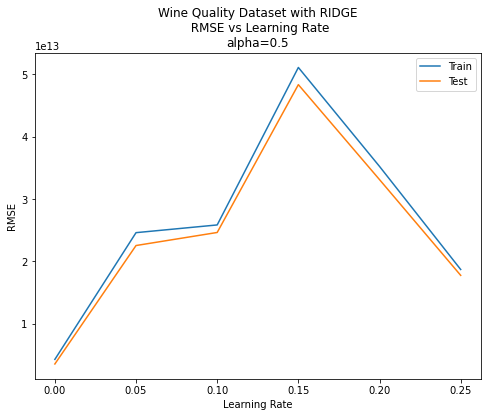

In [364]:
plt.figure(figsize=(8,6))
plt.title('Wine Quality Dataset with RIDGE\n RMSE vs Learning Rate\nalpha=0.5')
plt.plot(interval_ridge,rmse_ridge_train,label='Train')
plt.plot(interval_ridge,rmse_ridge_test,label='Test')
plt.xlabel('Learning Rate')
plt.ylabel('RMSE')
plt.legend()
plt.show()

### RIDGE: RMSE vs alpha (learnig rate is constant)

In [368]:
rmse_alpha_test=[]
rmse_alpha_train=[]

interval_alpha=np.arange(0,3,0.5)
for i in interval_alpha:
    ridge_three = linear_model.SGDRegressor(loss='squared_loss',penalty='l2' ,alpha=i,max_iter=50,learning_rate='constant',eta0=0.0001)
    ridge_three.fit(d_two_train_x,d_two_train_y)

    #predicted y values
    predicted_wine_quality_test= ridge_three.predict(d_two_test_x)
    rmse_ridge_test =mean_squared_error(d_two_test_y,predicted_wine_quality_test,squared=False)

    predicted_wine_quality_train= ridge_three.predict(d_two_train_x)
    rmse_ridge_train =mean_squared_error(d_two_train_y,predicted_wine_quality_train,squared=False)

    rmse_alpha_train.append(rmse_ridge_train )
    rmse_alpha_test.append(rmse_ridge_test)

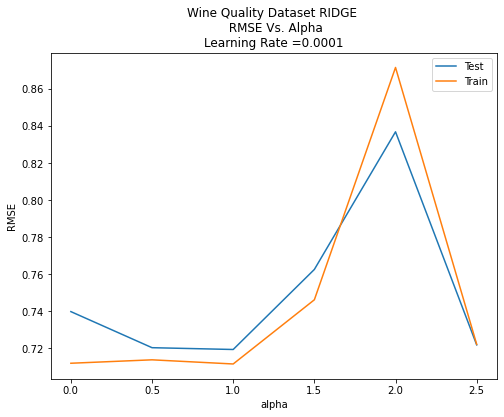

In [375]:
plt.figure(figsize=(8,6))
plt.title('Wine Quality Dataset RIDGE \n RMSE Vs. Alpha\nLearning Rate =0.0001')
plt.plot(interval_alpha,rmse_alpha_test,label='Test')
plt.plot(interval_alpha,rmse_alpha_train,label='Train')
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.legend()
plt.show()

## 2 RIDGE:  GridSearchCV

### 2.1 Ridge: Finding the Parameters

In [53]:
#learning the parameters
ridge_one.get_params()

{'alpha': 0.01,
 'average': False,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 1e-06,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'constant',
 'loss': 'squared_loss',
 'max_iter': 50,
 'n_iter_no_change': 5,
 'penalty': 'l2',
 'power_t': 0.25,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

We will use different combination of alpha and eta0 parameters.

### 2.2 Ridge: Applying the GridSearchCV

In [54]:
#learning rate=0.000009, number of iteration=1000
ridge_grid= linear_model.SGDRegressor(loss='squared_loss',penalty='l2',alpha=0,max_iter=50,learning_rate='constant',eta0=0.000009)

#setting the parameters to try
parameters={'eta0':[0.00001,0.0001,0.00001], 'alpha':[0.01,0.9,0.5]}
ridge_clf =GridSearchCV(reg_grid,parameters)
ridge_clf.fit(d_two_train_x,d_two_train_y)

C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


GridSearchCV(estimator=SGDRegressor(alpha=0, eta0=9e-06,
                                    learning_rate='constant', max_iter=50),
             param_grid={'alpha': [0.01, 0.9, 0.5],
                         'eta0': [1e-05, 0.0001, 1e-05]})

### 2.3 Ridge: Best Configuration by GridSearch

In [55]:
#calling the best hyperparameter configuration
ridge_clf.best_estimator_

SGDRegressor(alpha=0.5, eta0=1e-05, learning_rate='constant', max_iter=50)

### 2.4 Ridge: Table of Results for GridSearch

In [56]:
ridge_grid_cv_table = pd.DataFrame(ridge_clf.cv_results_)
ridge_grid_cv_table

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_eta0,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.018397,0.019563,0.001003,0.000001,0.01,1e-05,"{'alpha': 0.01, 'eta0': 1e-05}",0.090866,0.227238,-0.443359,0.284350,0.142483,0.060316,0.260548,5
1,0.016599,0.028703,0.000600,0.000490,0.01,0.0001,"{'alpha': 0.01, 'eta0': 0.0001}",-0.228800,0.253896,-0.047245,-0.189122,0.152806,-0.011693,0.188403,7
2,0.008398,0.004455,0.001002,0.000002,0.01,1e-05,"{'alpha': 0.01, 'eta0': 1e-05}",0.020519,0.215456,-0.468529,0.335650,0.216403,0.063900,0.284758,4
3,0.013599,0.014235,0.001003,0.000003,0.9,1e-05,"{'alpha': 0.9, 'eta0': 1e-05}",0.070529,0.211914,-0.249596,0.291952,0.182483,0.101456,0.189341,2
4,0.006199,0.005193,0.000803,0.000402,0.9,0.0001,"{'alpha': 0.9, 'eta0': 0.0001}",0.096141,0.129724,-0.175684,0.318578,-1.267674,-0.179783,0.566360,9
5,0.004413,0.002651,0.000601,0.000490,0.9,1e-05,"{'alpha': 0.9, 'eta0': 1e-05}",-0.085608,0.203095,-0.395436,0.273018,0.136907,0.026395,0.242794,6
6,0.009375,0.007655,0.000000,0.000000,0.5,1e-05,"{'alpha': 0.5, 'eta0': 1e-05}",0.096314,0.201913,-0.312081,0.278891,0.197570,0.092521,0.210453,3
7,0.004083,0.002170,0.003400,0.005314,0.5,0.0001,"{'alpha': 0.5, 'eta0': 0.0001}",0.054174,0.167379,-0.671572,0.299652,-0.186564,-0.067386,0.341717,8
8,0.006399,0.001497,0.001203,0.000400,0.5,1e-05,"{'alpha': 0.5, 'eta0': 1e-05}",0.092091,0.210830,-0.283789,0.309578,0.222784,0.110299,0.208858,1


In [57]:
ridge_clf.cv_results_['mean_test_score']

array([ 0.06031578, -0.01169322,  0.06389981,  0.10145612, -0.17978299,
        0.02639514,  0.09252135, -0.0673862 ,  0.11029863])

### 2.5 Ridge: Table of the Mean Test Scores CV of 9 Configuration

In [58]:
cv_for_9_conf=[]
for i in range(0,50):
    #learning rate=0.000009, number of iteration=1000
    ridge_grid_cv= linear_model.SGDRegressor(loss='squared_loss', penalty='l2',alpha=0,max_iter=i+1,learning_rate='constant',eta0=0.000009)
    #setting the parameters to try
    parameters={'eta0':[0.00001,0.0001,0.00001], 'alpha':[0.01,0.9,0.5]}
    ridge_exm =GridSearchCV(ridge_grid_cv,parameters)
    ridge_exm.fit(d_two_train_x,d_two_train_y)
    cv_for_9_conf.append(ridge_exm.cv_results_['mean_test_score'])

C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of itera

In [59]:
table_of_cv_for_9_conf=pd.DataFrame(cv_for_9_conf, columns=['Config 1','Config 2','Config 3','Config 4','Config 5','Config 6','Config 7','Config 8','Config 9'])
index = table_of_cv_for_9_conf.index
index.name = 'Iteration'
table_of_cv_for_9_conf

,Config 1,Config 2,Config 3,Config 4,Config 5,Config 6,Config 7,Config 8,Config 9
Iteration,,,,,,,,,
0,-3.998077,-0.053304,-3.978573,-4.179857,-0.139161,-4.308031,-4.077963,-0.291954,-4.116829
1,-1.154875,-0.472215,-1.134501,-1.223103,-0.202218,-1.202021,-1.250215,-0.478181,-1.227991
2,-0.414683,-0.186616,-0.392540,-0.434961,-0.142384,-0.429137,-0.439991,-0.310989,-0.403206
3,-0.143448,-0.169267,-0.161988,-0.171902,-0.061647,-0.207196,-0.185165,0.011960,-0.203311
4,-0.047799,-0.137829,-0.063699,-0.100843,0.061586,-0.111136,-0.139217,-0.172561,-0.124779
5,-0.082289,-0.291880,-0.018274,-0.039629,-0.244641,-0.046549,-0.115169,-0.169095,-0.030390
6,-0.005740,-0.320999,-0.011216,-0.053636,0.088704,-0.011744,-0.161370,-0.128674,-0.016724
7,-0.033519,0.058923,-0.068573,-0.002480,-0.547071,-0.019519,-0.030498,-0.298639,-0.009989
8,-0.001515,0.105918,-0.036693,0.009188,-0.065600,0.018417,-0.027934,-0.203732,0.025815


### RIDGE: 2.6 Plotting  CV Mean Score

#### Hyperparameter Configuration 1 Cross Validation Means Score

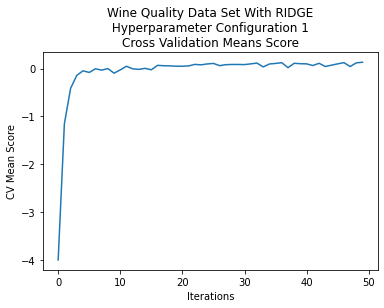

In [60]:
plt.title('Wine Quality Data Set With RIDGE\n Hyperparameter Configuration 1 \nCross Validation Means Score')
plt.xlabel('Iterations')
plt.ylabel('CV Mean Score')
plt.plot(table_of_cv_for_9_conf['Config 1'])
plt.show()

####  RIDGE Hyperparameter Configuration 2 Cross Validation Means Score

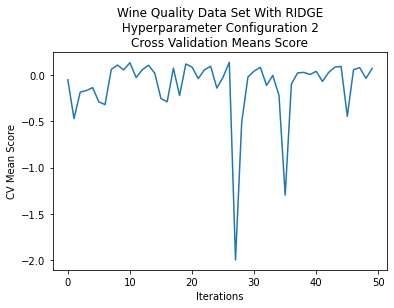

In [61]:
plt.title('Wine Quality Data Set With RIDGE\n Hyperparameter Configuration 2 \nCross Validation Means Score')
plt.xlabel('Iterations')
plt.ylabel('CV Mean Score')
plt.plot(table_of_cv_for_9_conf['Config 2'])
plt.show()

#### RIDGE: Hyperparameter Configuration 3 Cross Validation Means Score

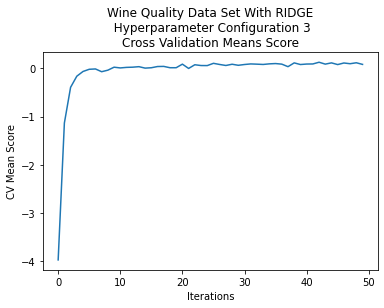

In [62]:
plt.title('Wine Quality Data Set With RIDGE\n  Hyperparameter Configuration 3 \nCross Validation Means Score')
plt.xlabel('Iterations')
plt.ylabel('CV Mean Score')
plt.plot(table_of_cv_for_9_conf['Config 3'])
plt.show()

#### RIDGE: Hyperparameter Configuration 4 Cross Validation Means Score#### 

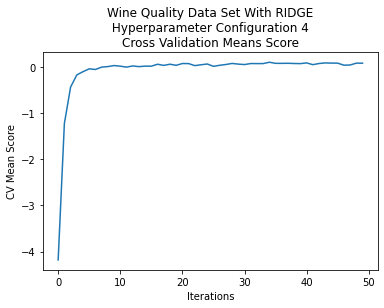

In [63]:
plt.title('Wine Quality Data Set With RIDGE\n Hyperparameter Configuration 4 \nCross Validation Means Score')
plt.xlabel('Iterations')
plt.ylabel('CV Mean Score')
plt.plot(table_of_cv_for_9_conf['Config 4'])
plt.show()

#### RIDGE: Hyperparameter Configuration 5 Cross Validation Means Score

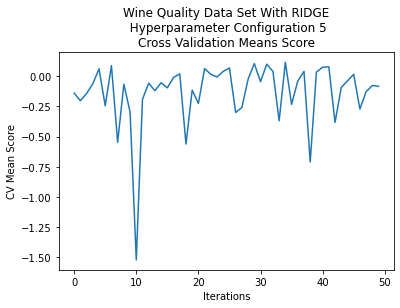

In [64]:
plt.title('Wine Quality Data Set With RIDGE\n  Hyperparameter Configuration 5 \nCross Validation Means Score')
plt.xlabel('Iterations')
plt.ylabel('CV Mean Score')
plt.plot(table_of_cv_for_9_conf['Config 5'])
plt.show()

#### RIDGE: Hyperparameter Configuration 6 Cross Validation Means Score

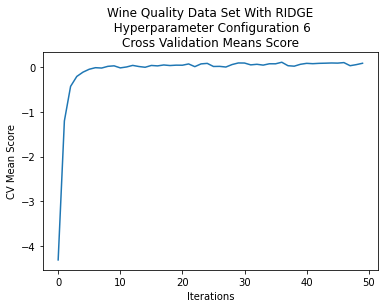

In [65]:
plt.title('Wine Quality Data Set With RIDGE\n  Hyperparameter Configuration 6 \nCross Validation Means Score')
plt.xlabel('Iterations')
plt.ylabel('CV Mean Score')
plt.plot(table_of_cv_for_9_conf['Config 6'])
plt.show()

#### RIDGE: Hyperparameter Configuration 7 Cross Validation Means Score

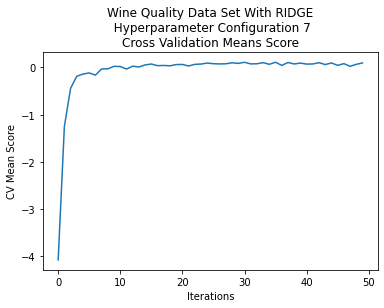

In [66]:
plt.title('Wine Quality Data Set With RIDGE\n  Hyperparameter Configuration 7 \nCross Validation Means Score')
plt.xlabel('Iterations')
plt.ylabel('CV Mean Score')
plt.plot(table_of_cv_for_9_conf['Config 7'])
plt.show()

#### RIDGE: Hyperparameter Configuration 8 Cross Validation Means Score

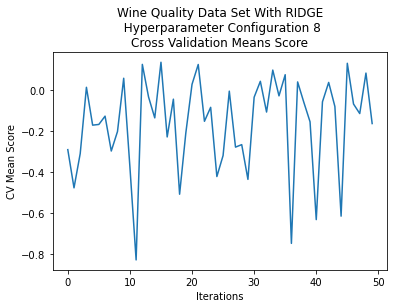

In [67]:
plt.title('Wine Quality Data Set With RIDGE\n  Hyperparameter Configuration 8 \nCross Validation Means Score')
plt.xlabel('Iterations')
plt.ylabel('CV Mean Score')
plt.plot(table_of_cv_for_9_conf['Config 8'])
plt.show()

#### RIDGE: Hyperparameter Configuration 9 Cross Validation Means Score

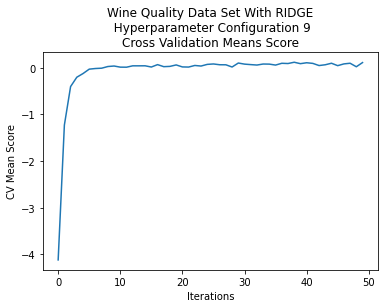

In [68]:
plt.title('Wine Quality Data Set With RIDGE\n  Hyperparameter Configuration 9 \nCross Validation Means Score')
plt.xlabel('Iterations')
plt.ylabel('CV Mean Score')
plt.plot(table_of_cv_for_9_conf['Config 9'])
plt.show()

### 2.7 RIDGE: the Best Hyperparameter

According to GridSearch and manually tuning hyperparameter, Hyperparameter 3 configuration has the best performance.

In [69]:
#learning rate=0.00001 number of iteration =50
ridge_best = linear_model.SGDRegressor(loss='squared_loss',penalty='l2' ,alpha=0.5,max_iter=50,learning_rate='constant',eta0=0.00001)
ridge_best.fit(d_two_train_x,d_two_train_y)


#predicted y values
predicted_wine_quality_best = ridge_best.predict(d_two_test_x)


#mse error
rmse_wine_ridge_best =mean_squared_error(d_two_test_y,predicted_wine_quality_best,squared=False)


In [70]:
rmse_ridge_best_train =[]
rmse_ridge_best_test=[]
for i in range(0,50):
    ridge_best = linear_model.SGDRegressor(loss='squared_loss',penalty='l2' ,alpha=0.001,max_iter=i+1,learning_rate='constant',eta0=0.0001)
    ridge_best.fit(d_two_train_x,d_two_train_y)
    predicted_wine_quality_test = ridge_best.predict(d_two_test_x)
    predicted_wine_quality_train = ridge_best.predict(d_two_train_x)
    rmse_wine_test =mean_squared_error(d_two_test_y,predicted_wine_quality_test,squared=False)
    rmse_wine_train =mean_squared_error(d_two_train_y,predicted_wine_quality_train,squared=False)
    rmse_ridge_best_train.append(rmse_wine_train)
    rmse_ridge_best_test.append(rmse_wine_test)

C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of itera

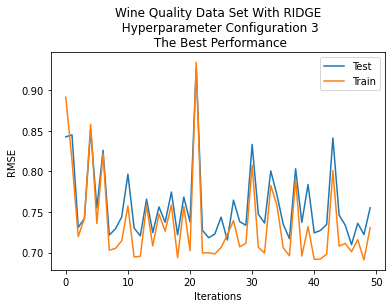

In [71]:
plt.title('Wine Quality Data Set With RIDGE\n  Hyperparameter Configuration 3 \n The Best Performance')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.plot(rmse_ridge_best_test,label='Test')
plt.plot(rmse_ridge_best_train,label='Train')
plt.legend()
plt.show()

# MODEL 3: LASSO

## 1. LASSO: Hyperparameter Tuning Manually

#### LASSO: Hyperparameter Set 1: alpha =0.01 , learning rate =0.00001

In [72]:
#learning rate=0.00001 number of iteration =50
lasso_one = linear_model.SGDRegressor(loss='squared_loss',penalty='l1' ,alpha=0.01,max_iter=50,learning_rate='constant',eta0=0.000001)
lasso_one.fit(d_two_train_x,d_two_train_y)


#predicted y values
predicted_lasso_wine_quality_one = lasso_one.predict(d_two_test_x)


#mse error
rmse_wine_lasso_one =mean_squared_error(d_two_test_y,predicted_lasso_wine_quality_one,squared=False)


C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [73]:
print('RMSE for Hyperparameter Configuration 1 by LAsso:\n ',rmse_wine_lasso_one)

RMSE for Hyperparameter Configuration 1 by LAsso:
  0.7576628855717003


In [74]:
rmse_lasso_one_train =[]
rmse_lasso_one_test=[]
for i in range(0,50):
    lasso_one = linear_model.SGDRegressor(loss='squared_loss',penalty='l1' ,alpha=0.01,max_iter=i+1,learning_rate='constant',eta0=0.000001)
    lasso_one.fit(d_two_train_x,d_two_train_y)
    predicted_wine_quality_test = lasso_one.predict(d_two_test_x)
    predicted_wine_quality_train = lasso_one.predict(d_two_train_x)
    rmse_wine_test =mean_squared_error(d_two_test_y,predicted_wine_quality_test,squared=False)
    rmse_wine_train =mean_squared_error(d_two_train_y,predicted_wine_quality_train,squared=False)
    rmse_lasso_one_train.append(rmse_wine_train)
    rmse_lasso_one_test.append(rmse_wine_test)

C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of itera

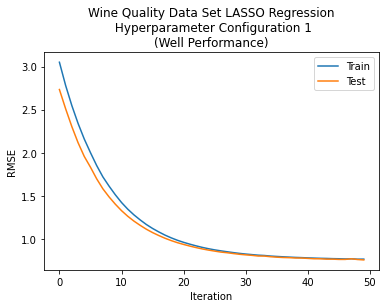

In [75]:
plt.title('Wine Quality Data Set LASSO Regression\n Hyperparameter Configuration 1\n(Well Performance)')
plt.plot(rmse_lasso_one_train,label='Train')
plt.plot(rmse_lasso_one_test,label='Test')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.legend()
plt.show()

#### LASSO: Hyperparameter Set 2: alpha =0.9 , learning rate =0.0001

In [76]:
#learning rate=0.00001 number of iteration =50
lasso_two = linear_model.SGDRegressor(loss='squared_loss',penalty='l1' ,alpha=0.9,max_iter=50,learning_rate='constant',eta0=0.0001)
lasso_two.fit(d_two_train_x,d_two_train_y)


#predicted y values
predicted_lasso_wine_quality_two = lasso_two.predict(d_two_test_x)


#mse error
rmse_wine_lasso_two =mean_squared_error(d_two_test_y,predicted_lasso_wine_quality_two,squared=False)


In [77]:
print('RMSE for Hyperparameter Configuration 2 by LAsso:\n ',rmse_wine_lasso_two)

RMSE for Hyperparameter Configuration 2 by LAsso:
  0.7279490268282004


In [78]:
rmse_lasso_two_train =[]
rmse_lasso_two_test=[]
for i in range(0,50):
    lasso_two = linear_model.SGDRegressor(loss='squared_loss',penalty='l1' ,alpha=0.9,max_iter=i+1,learning_rate='constant',eta0=0.0001)
    lasso_two.fit(d_two_train_x,d_two_train_y)
    predicted_wine_quality_test = lasso_two.predict(d_two_test_x)
    predicted_wine_quality_train = lasso_two.predict(d_two_train_x)
    rmse_wine_test =mean_squared_error(d_two_test_y,predicted_wine_quality_test,squared=False)
    rmse_wine_train =mean_squared_error(d_two_train_y,predicted_wine_quality_train,squared=False)
    rmse_lasso_two_train.append(rmse_wine_train)
    rmse_lasso_two_test.append(rmse_wine_test)

C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of itera

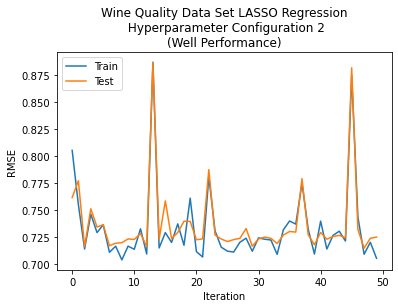

In [79]:
plt.title('Wine Quality Data Set LASSO Regression\n Hyperparameter Configuration 2\n(Well Performance)')
plt.plot(rmse_lasso_two_train,label='Train')
plt.plot(rmse_lasso_two_test,label='Test')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.legend()
plt.show()

#### LASSO: Hyperparameter Set 3: alpha =0.5 , learning rate =0.00001

In [80]:
#learning rate=0.00001 alpha =0.5 number of iteration =50
lasso_three = linear_model.SGDRegressor(loss='squared_loss',penalty='l1' ,alpha=0.5,max_iter=50,learning_rate='constant',eta0=0.00001)
lasso_three.fit(d_two_train_x,d_two_train_y)


#predicted y values
predicted_lasso_wine_quality_three = lasso_three.predict(d_two_test_x)


#mse error
rmse_wine_lasso_three =mean_squared_error(d_two_test_y,predicted_lasso_wine_quality_three,squared=False)


In [81]:
print('RMSE for Hyperparameter Configuration 3 by LAsso:\n ',rmse_wine_lasso_three)

RMSE for Hyperparameter Configuration 3 by LAsso:
  0.7200784639805426


In [82]:
rmse_lasso_three_train =[]
rmse_lasso_three_test=[]
for i in range(0,50):
    lasso_three = linear_model.SGDRegressor(loss='squared_loss',penalty='l1' ,alpha=0.5,max_iter=i+1,learning_rate='constant',eta0=0.00001)
    lasso_three.fit(d_two_train_x,d_two_train_y)
    predicted_wine_quality_test = lasso_three.predict(d_two_test_x)
    predicted_wine_quality_train = lasso_three.predict(d_two_train_x)
    rmse_wine_test =mean_squared_error(d_two_test_y,predicted_wine_quality_test,squared=False)
    rmse_wine_train =mean_squared_error(d_two_train_y,predicted_wine_quality_train,squared=False)
    rmse_lasso_three_train.append(rmse_wine_train)
    rmse_lasso_three_test.append(rmse_wine_test)

C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of itera

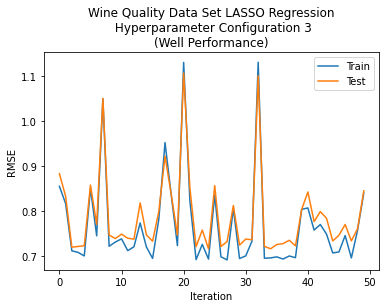

In [83]:
plt.title('Wine Quality Data Set LASSO Regression\n Hyperparameter Configuration 3\n(Well Performance)')
plt.plot(rmse_ridge_three_train,label='Train')
plt.plot(rmse_ridge_three_test,label='Test')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.legend()
plt.show()

### 2.1 LASSO: Table of Results Hyperparameter Tuning Manually 

In [84]:
over_all_errors_lasso = [rmse_wine_lasso_one,rmse_wine_lasso_two,rmse_wine_lasso_three]
over_all_errors_lasso

[0.7576628855717003, 0.7279490268282004, 0.7200784639805426]

In [85]:
rmse_table_lasso=pd.DataFrame({'RMSE(LASSO)':over_all_errors_lasso},index=['Configuration 1','Configuration 2','Configuration 3'])
rmse_table_lasso

,RMSE(LASSO)
Configuration 1,0.757663
Configuration 2,0.727949
Configuration 3,0.720078


## LASSO: RMSE vs Hyperparameters

### LASSO: RMSE vs Learning Rate

In [388]:
lasso_lr_train=[]
lasso_lr_test=[]
interval_lasso=np.arange(0.00001,0.1,0.005)
for i in interval_lasso:
    #learning rate=0.00001 alpha =0.5 number of iteration =50
    lasso_three = linear_model.SGDRegressor(loss='squared_loss',penalty='l1' ,alpha=0.5,max_iter=50,learning_rate='constant',eta0=i)
    lasso_three.fit(d_two_train_x,d_two_train_y)
    
    #predicted y values
    predicted_lasso_wine_quality_test= lasso_three.predict(d_two_test_x)
    #mse error 
    rmse_wine_lasso_test =mean_squared_error(d_two_test_y,predicted_lasso_wine_quality_test,squared=False)

    #predicted y values
    predicted_lasso_wine_quality_train= lasso_three.predict(d_two_train_x)
    #mse error 
    rmse_wine_lasso_train =mean_squared_error(d_two_train_y,predicted_lasso_wine_quality_train,squared=False)
    lasso_lr_train.append(rmse_wine_lasso_train)
    lasso_lr_test.append(rmse_wine_lasso_test)

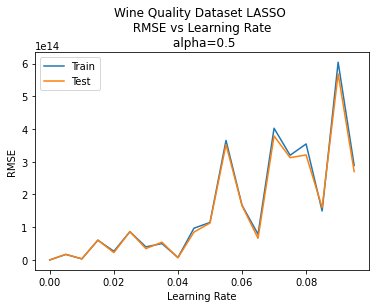

In [393]:
plt.title('Wine Quality Dataset LASSO \n RMSE vs Learning Rate \n alpha=0.5')
plt.plot(interval_lasso,lasso_lr_train,label='Train')
plt.plot(interval_lasso,lasso_lr_test,label='Test')
plt.xlabel('Learning Rate')
plt.ylabel('RMSE')
plt.legend()
plt.show()

###  LASSO: RMSE vs Alpha

In [396]:
lasso_lr_train=[]
lasso_lr_test=[]
interval_lasso=np.arange(0,2,0.4)
for i in interval_lasso:
    #learning rate=0.00001 alpha =0.5 number of iteration =50
    lasso_three = linear_model.SGDRegressor(loss='squared_loss',penalty='l1' ,alpha=i,max_iter=50,learning_rate='constant',eta0=0.00001)
    lasso_three.fit(d_two_train_x,d_two_train_y)
    
    #predicted y values
    predicted_lasso_wine_quality_test= lasso_three.predict(d_two_test_x)
    #mse error 
    rmse_wine_lasso_test =mean_squared_error(d_two_test_y,predicted_lasso_wine_quality_test,squared=False)

    #predicted y values
    predicted_lasso_wine_quality_train= lasso_three.predict(d_two_train_x)
    #mse error 
    rmse_wine_lasso_train =mean_squared_error(d_two_train_y,predicted_lasso_wine_quality_train,squared=False)
    lasso_lr_train.append(rmse_wine_lasso_train)
    lasso_lr_test.append(rmse_wine_lasso_test)

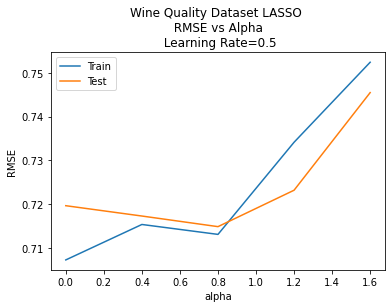

In [398]:
plt.title('Wine Quality Dataset LASSO \n RMSE vs Alpha \n Learning Rate=0.5')
plt.plot(interval_lasso,lasso_lr_train,label='Train')
plt.plot(interval_lasso,lasso_lr_test,label='Test')
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.legend()
plt.show()

## 2 LASSO:  GridSearchCV

### 2.1 LASSO: Finding the Parameters

In [86]:
#learning the parameters
lasso_one.get_params()

{'alpha': 0.01,
 'average': False,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 1e-06,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'constant',
 'loss': 'squared_loss',
 'max_iter': 50,
 'n_iter_no_change': 5,
 'penalty': 'l1',
 'power_t': 0.25,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

We will use alpha and eta0 for GridSEarchCV.

### 2.2 LASSO: Applying the GridSearchCV

In [87]:
ridge_grid= linear_model.SGDRegressor(loss='squared_loss', penalty='l2',alpha=0,max_iter=50,learning_rate='constant',eta0=0.000009)

#setting the parameters to try
parameters={'eta0':[0.00001,0.0001,0.00001], 'alpha':[0.01,0.9,0.5]}
lasso_clf =GridSearchCV(reg_grid,parameters)
lasso_clf.fit(d_two_train_x,d_two_train_y)

C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


GridSearchCV(estimator=SGDRegressor(alpha=0, eta0=9e-06,
                                    learning_rate='constant', max_iter=50),
             param_grid={'alpha': [0.01, 0.9, 0.5],
                         'eta0': [1e-05, 0.0001, 1e-05]})

### 2.3 LASSO: Best Configuration by GridSearch

In [88]:
#calling the best hyperparameter configuration
lasso_clf.best_estimator_

SGDRegressor(alpha=0.01, eta0=1e-05, learning_rate='constant', max_iter=50)

### 2.4 LASSO: Table of Results for GridSearch

In [89]:
lasso_grid_cv_table = pd.DataFrame(lasso_clf.cv_results_)
lasso_grid_cv_table

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_eta0,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013398,0.010745,0.002402,0.002800,0.01,1e-05,"{'alpha': 0.01, 'eta0': 1e-05}",0.091879,0.236820,-0.272158,0.348530,0.183359,0.117686,0.211868,2
1,0.005402,0.006313,0.005598,0.008708,0.01,0.0001,"{'alpha': 0.01, 'eta0': 0.0001}",0.064665,0.241634,-0.762711,0.345296,-0.003196,-0.022862,0.390108,8
2,0.005599,0.000491,0.001201,0.000400,0.01,1e-05,"{'alpha': 0.01, 'eta0': 1e-05}",0.102283,0.231327,-0.211312,0.342216,0.151269,0.123157,0.185894,1
3,0.005197,0.000401,0.000602,0.000492,0.9,1e-05,"{'alpha': 0.9, 'eta0': 1e-05}",0.005272,0.124926,-0.279016,0.300029,0.190211,0.068284,0.198175,6
4,0.002599,0.000490,0.000601,0.000490,0.9,0.0001,"{'alpha': 0.9, 'eta0': 0.0001}",-1.803539,0.143681,-0.100687,-0.192665,0.224485,-0.345745,0.744762,9
5,0.006199,0.001721,0.003001,0.002280,0.9,1e-05,"{'alpha': 0.9, 'eta0': 1e-05}",0.026842,0.205840,-0.246753,0.307762,0.140829,0.086904,0.190140,4
6,0.006665,0.007356,0.000000,0.000000,0.5,1e-05,"{'alpha': 0.5, 'eta0': 1e-05}",0.090114,0.203429,-0.232990,0.333200,0.182048,0.115160,0.190600,3
7,0.003125,0.006249,0.003125,0.006249,0.5,0.0001,"{'alpha': 0.5, 'eta0': 0.0001}",-0.158204,0.034833,-0.062884,0.351718,0.198925,0.072878,0.182711,5
8,0.018750,0.015303,0.000000,0.000000,0.5,1e-05,"{'alpha': 0.5, 'eta0': 1e-05}",0.094255,0.192368,-0.264198,0.337966,-0.058220,0.060434,0.207383,7


In [90]:
ridge_clf.cv_results_['mean_test_score']

array([ 0.06031578, -0.01169322,  0.06389981,  0.10145612, -0.17978299,
        0.02639514,  0.09252135, -0.0673862 ,  0.11029863])

### 2.5 LASSO: Table of the Mean Test Scores CV of 9 Configuration

In [91]:
lasso_cv_for_9_conf=[]
for i in range(0,50):
    #learning rate=0.000009, number of iteration=1000
    lasso_grid_cv= linear_model.SGDRegressor(loss='squared_loss',penalty='l1', alpha=1,max_iter=i+1,learning_rate='constant',eta0=0.000009)
    #setting the parameters to try
    parameters={'eta0':[0.00001,0.0001,0.00001], 'alpha':[0.01,0.9,0.5]}
    lasso_exm =GridSearchCV(lasso_grid_cv,parameters)
    lasso_exm.fit(d_two_train_x,d_two_train_y)
    lasso_cv_for_9_conf.append(lasso_exm.cv_results_['mean_test_score'])

C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Gokce Sucu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of itera

In [92]:
table_of_lasso_cv_for_9_conf=pd.DataFrame(lasso_cv_for_9_conf, columns=['Config 1','Config 2','Config 3','Config 4','Config 5','Config 6','Config 7','Config 8','Config 9'])
index = table_of_lasso_cv_for_9_conf.index
index.name = 'Iteration'
table_of_lasso_cv_for_9_conf

,Config 1,Config 2,Config 3,Config 4,Config 5,Config 6,Config 7,Config 8,Config 9
Iteration,,,,,,,,,
0,-4.133014,-0.118971,-4.305025,-4.513060,-0.039411,-4.529855,-4.364405,-0.020640,-4.395415
1,-1.144849,0.012037,-1.217804,-1.514519,0.046628,-1.466165,-1.292311,0.048275,-1.341132
2,-0.440450,0.030961,-0.401859,-0.621618,-0.202620,-0.636813,-0.502594,0.048002,-0.491074
3,-0.131294,-0.151921,-0.178694,-0.278860,-0.042458,-0.276848,-0.215576,0.036631,-0.231496
4,-0.129939,0.033517,-0.082593,-0.155955,0.037002,-0.152587,-0.124241,0.122413,-0.137822
5,-0.031522,0.050032,-0.113433,-0.078978,-0.042318,-0.156031,-0.073614,0.085338,-0.057834
6,-0.002223,-0.049042,-0.070883,-0.085212,0.048923,-0.052381,-0.034316,0.076699,-0.035613
7,-0.043664,0.039234,-0.011028,-0.008352,0.103982,-0.041634,-0.019461,0.138289,-0.011200
8,-0.016741,0.104039,-0.036281,-0.051440,0.101243,-0.016835,-0.011678,0.127717,-0.010533


### LASSO: 2.6 Plotting  CV Mean Score

#### LASSO: Hyperparameter Configuration 1 Cross Validation Means Score

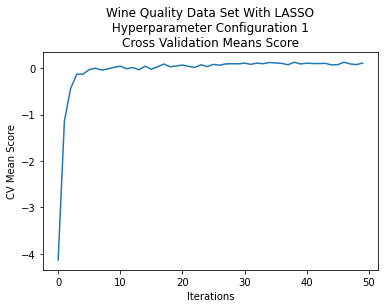

In [93]:
plt.title('Wine Quality Data Set With LASSO\n Hyperparameter Configuration 1 \nCross Validation Means Score')
plt.xlabel('Iterations')
plt.ylabel('CV Mean Score')
plt.plot(table_of_lasso_cv_for_9_conf['Config 1'])
plt.show()

#### LASSO: Hyperparameter Configuration 2 Cross Validation Means Score

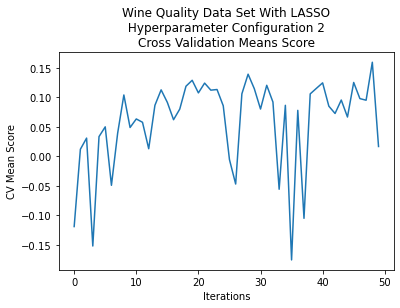

In [94]:
plt.title('Wine Quality Data Set With LASSO\n Hyperparameter Configuration 2 \nCross Validation Means Score')
plt.xlabel('Iterations')
plt.ylabel('CV Mean Score')
plt.plot(table_of_lasso_cv_for_9_conf['Config 2'])
plt.show()

#### LASSO: Hyperparameter Configuration 3 Cross Validation Means Score

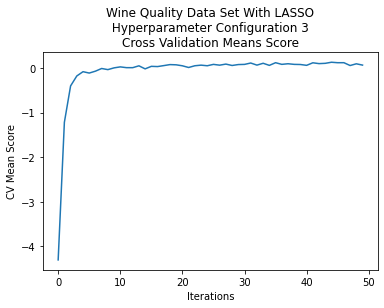

In [95]:
plt.title('Wine Quality Data Set With LASSO\n Hyperparameter Configuration 3 \nCross Validation Means Score')
plt.xlabel('Iterations')
plt.ylabel('CV Mean Score')
plt.plot(table_of_lasso_cv_for_9_conf['Config 3'])
plt.show()

#### LASSO: Hyperparameter Configuration 4 Cross Validation Means Score

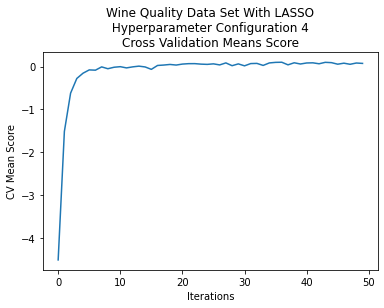

In [96]:
plt.title('Wine Quality Data Set With LASSO\n Hyperparameter Configuration 4 \nCross Validation Means Score')
plt.xlabel('Iterations')
plt.ylabel('CV Mean Score')
plt.plot(table_of_lasso_cv_for_9_conf['Config 4'])
plt.show()

#### LASSO: Hyperparameter Configuration 5 Cross Validation Means Score

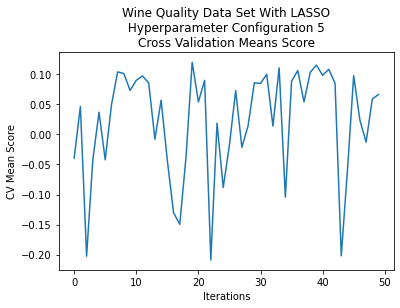

In [97]:
plt.title('Wine Quality Data Set With LASSO\n Hyperparameter Configuration 5 \nCross Validation Means Score')
plt.xlabel('Iterations')
plt.ylabel('CV Mean Score')
plt.plot(table_of_lasso_cv_for_9_conf['Config 5'])
plt.show()

#### LASSO: Hyperparameter Configuration 6 Cross Validation Means Score

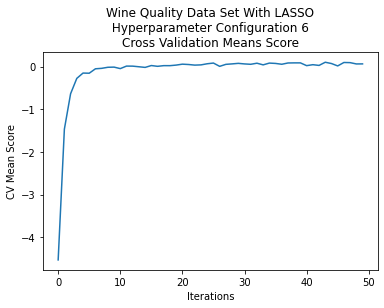

In [98]:
plt.title('Wine Quality Data Set With LASSO\n Hyperparameter Configuration 6 \nCross Validation Means Score')
plt.xlabel('Iterations')
plt.ylabel('CV Mean Score')
plt.plot(table_of_lasso_cv_for_9_conf['Config 6'])
plt.show()

#### LASSO: Hyperparameter Configuration 7 Cross Validation Means Score

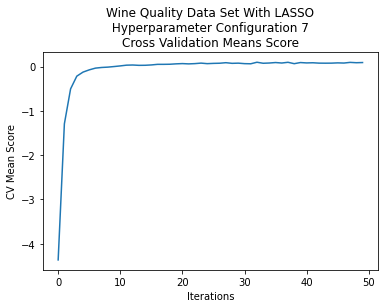

In [99]:
plt.title('Wine Quality Data Set With LASSO\n Hyperparameter Configuration 7 \nCross Validation Means Score')
plt.xlabel('Iterations')
plt.ylabel('CV Mean Score')
plt.plot(table_of_lasso_cv_for_9_conf['Config 7'])
plt.show()

#### LASSO: Hyperparameter Configuration 8 Cross Validation Means Score

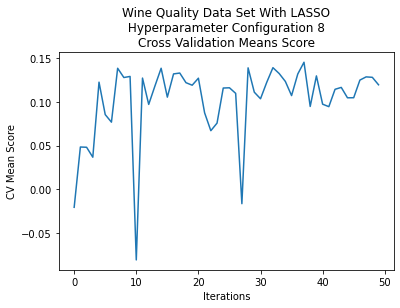

In [100]:
plt.title('Wine Quality Data Set With LASSO\n Hyperparameter Configuration 8 \nCross Validation Means Score')
plt.xlabel('Iterations')
plt.ylabel('CV Mean Score')
plt.plot(table_of_lasso_cv_for_9_conf['Config 8'])
plt.show()

#### LASSO: Hyperparameter Configuration 9 Cross Validation Means Score

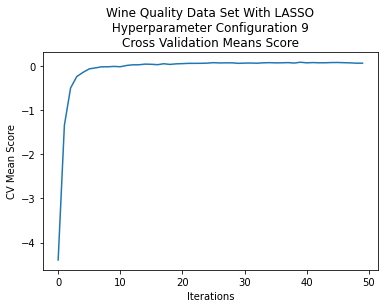

In [101]:
plt.title('Wine Quality Data Set With LASSO\n Hyperparameter Configuration 9 \nCross Validation Means Score')
plt.xlabel('Iterations')
plt.ylabel('CV Mean Score')
plt.plot(table_of_lasso_cv_for_9_conf['Config 9'])
plt.show()

### 2.7 LASSO: the Best Hyperparameter

According to GridSearch and manually tuning hyperparameter, Hyperparameter 3 configuration has the best performance.

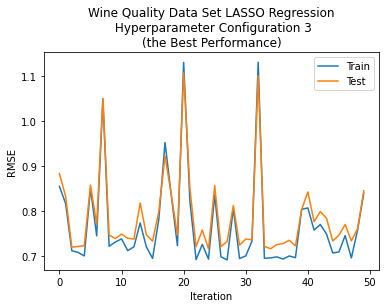

In [102]:
plt.title('Wine Quality Data Set LASSO Regression\n Hyperparameter Configuration 3\n(the Best Performance)')
plt.plot(rmse_ridge_three_train,label='Train')
plt.plot(rmse_ridge_three_test,label='Test')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.legend()
plt.show()

# EXERCISE 2:
# HGHER ORDER POLYNOMIAL REGRESSION

## TASK A: Prediction with High Degree Polynomials

### 0. Importing Libraries

In [103]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

### 1. For Degree 1

In [104]:
lin_reg = LinearRegression()
lin_reg.fit(X, Y)

LinearRegression()

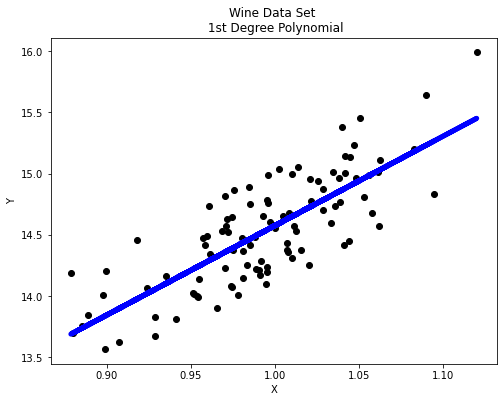

In [105]:
plt.figure(figsize=(8,6)) 
plt.scatter(X, Y, color='black')
plt.plot(X, lin_reg.predict(X), color='blue',linewidth=5)
plt.title('Wine Data Set \n 1st Degree Polynomial')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


### 2. For Degree 2

In [106]:
model = Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', LinearRegression(fit_intercept=False))])
model = model.fit(X, Y)
coef_two=(model.named_steps['linear'].coef_)[0]

In [107]:
def two_degree(x):
    return coef_two[0]+coef_two[1]*x+coef_two[2]*(x**2)

K=np.arange(0.87,1.13,0.001)

two_degree_points=[]
for i in K:
    two_degree_points.append(two_degree(i))

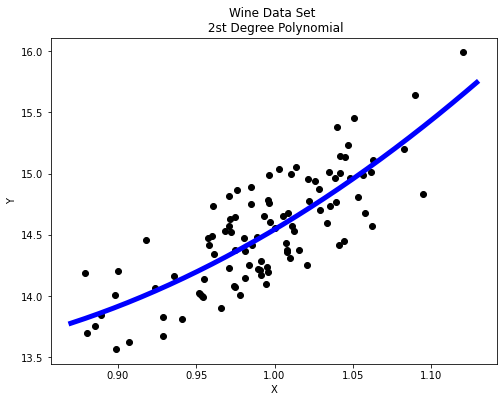

In [108]:
plt.figure(figsize=(8,6)) 
plt.title('Wine Data Set \n 2st Degree Polynomial')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(K,two_degree_points,color='blue',linewidth=5)
plt.scatter(X, Y, color='black')
plt.show()

### 3. For Degree 7

In [109]:
model_seven = Pipeline([('poly', PolynomialFeatures(degree=7)),('linear', LinearRegression(fit_intercept=False))])
model_seven = model_seven.fit(X, Y)
coef_seven=(model_seven.named_steps['linear'].coef_)[0]


In [110]:
coef_seven

array([-5.55030163e+06,  3.96814953e+07, -1.21432147e+08,  2.06188150e+08,
       -2.09800637e+08,  1.27928677e+08, -4.32840738e+07,  6.26885149e+06])

In [111]:
def poly_seven(x):
    return coef_seven[0]+coef_seven[1]*x+coef_seven[2]*(x**2)+coef_seven[3]*(x**3)+coef_seven[4]*(x**4)+coef_seven[5]*(x**5)+coef_seven[6]*(x**6)+coef_seven[7]*(x**7)

In [112]:
K=np.arange(0.89,1.13,0.0000005)

seven_degree_points=[]
for i in K:
    seven_degree_points.append(poly_seven(i))

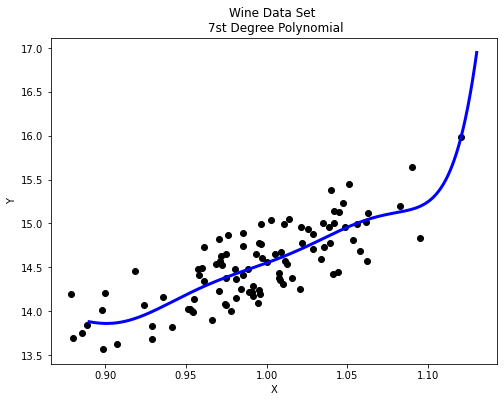

In [113]:
plt.figure(figsize=(8,6)) 
plt.title('Wine Data Set \n 7st Degree Polynomial')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(K,seven_degree_points,color='blue',linewidth=3)
plt.scatter(X, Y, color='black')
plt.show()

### 3. For Degree 10

In [114]:
model_ten = Pipeline([('poly', PolynomialFeatures(degree=10)),('linear', LinearRegression(fit_intercept=False))])
model_ten = model_ten.fit(X, Y)
coef_ten=(model_ten.named_steps['linear'].coef_)[0]


In [115]:
len(coef_ten)

11

In [116]:
def poly_ten(x):
    total = 0
    for i in range(0,11):
        total=total +coef_ten[i]*(x**i)
    return total

In [289]:
K=np.arange(0.878,1.121,0.000005)

ten_degree_points=[]
for i in K:
    ten_degree_points.append(poly_ten(i))

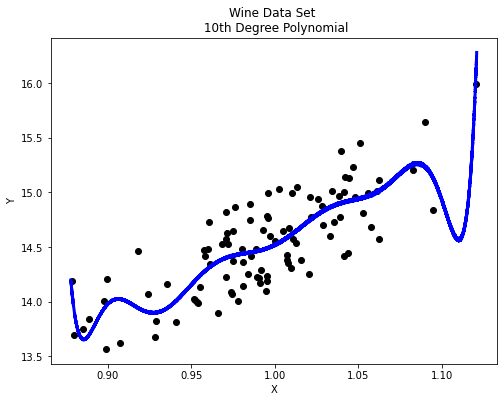

In [290]:
plt.figure(figsize=(8,6)) 
plt.title('Wine Data Set \n 10th Degree Polynomial')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(K,ten_degree_points,color='blue',linewidth=3)
plt.scatter(X, Y, color='black')
plt.show()

In [119]:
x=1
total =0
for i in range(0,10):
    total=total +coef_ten[i]*(x**i)

### 4. For 16 Degree

In [120]:
model_sixteen = Pipeline([('poly', PolynomialFeatures(degree=16)),('linear', LinearRegression(fit_intercept=False))])
model_sixteen = model_sixteen.fit(X, Y)
coef_sixteen=(model_sixteen.named_steps['linear'].coef_)[0]


In [121]:
def poly_sixteen(x):
    total=0
    for i in range(0,17):
        total = total + coef_sixteen[i]*(x**i)
    return total

In [250]:
K=np.arange(0.87,1.121,0.000005)

sixteen_degree_points=[]
for i in K:
    sixteen_degree_points.append(poly_sixteen(i))

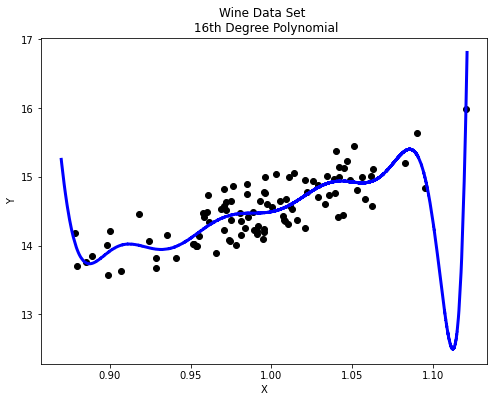

In [251]:
plt.figure(figsize=(8,6)) 
plt.title('Wine Data Set \n 16th Degree Polynomial')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(K,sixteen_degree_points,color='blue',linewidth=3)
plt.scatter(X, Y, color='black')
plt.show()

### 5. For Degree 100

In [124]:
model_hundred= Pipeline([('poly', PolynomialFeatures(degree=100)),('linear', LinearRegression(fit_intercept=False))])
model_hundred = model_hundred.fit(X, Y)
coef_hundred=(model_hundred.named_steps['linear'].coef_)[0]


In [125]:
def poly_hundred(x):
    total=0
    for i in range(0,101):
        total = total + coef_hundred[i]*(x**i)
    return total

In [238]:
K=np.arange(0.87,1.0958,0.00005)

hundred_degree_points=[]
for i in K:
    hundred_degree_points.append(poly_hundred(i))

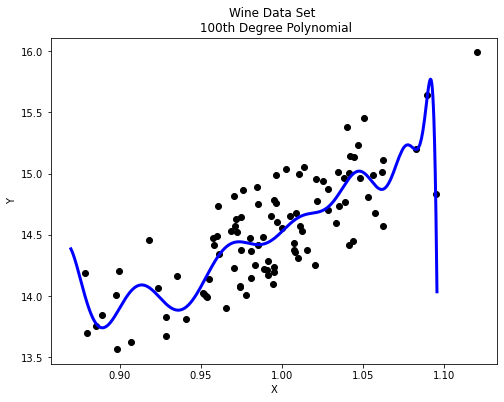

In [239]:
plt.figure(figsize=(8,6)) 
plt.title('Wine Data Set \n 100th Degree Polynomial')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(K,hundred_degree_points,color='blue',linewidth=3)
plt.scatter(X, Y, color='black')
plt.show()

## TASK B: EFFECT of REGULARIZATION

### 0. Importing the Libraries

In [128]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

### 2. For $\lambda=10^{-6}$

In [129]:
model_reg_two = make_pipeline(PolynomialFeatures(degree=10), Ridge(alpha=0.000001
                                                                   ,fit_intercept=False),)
model_reg_two = model_reg_two.fit(X, Y)
coeff_ridge_two=(model_reg_two.named_steps['ridge'].coef_)[0]

print(coeff_ridge_two)

[ 79.4280561  -67.31293392 -69.28685739 -11.20407908  47.46350114
  71.21901491  47.8976487  -11.37026128 -71.59308136 -72.7407836
  72.06175795]


In [130]:
def poly_reg_two(x):
    total=0
    for i in range(0,11):
        total = total + coeff_ridge_two[i]*(x**i)
    return total

In [131]:
K=np.arange(0.89,1.13,0.00005)

reg_two_list=[]
for i in K:
    reg_two_list.append(poly_reg_two(i))

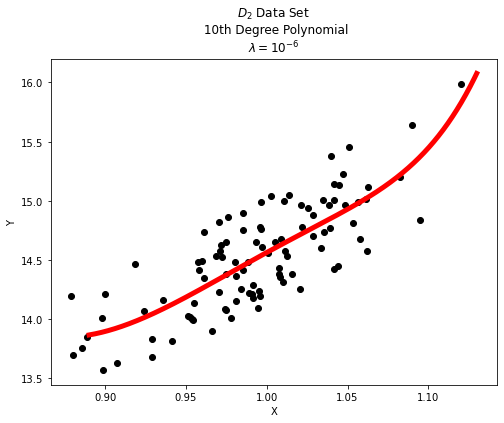

In [132]:
plt.figure(figsize=(8,6)) 
plt.title('$D_2$ Data Set \n 10th Degree Polynomial\n$\lambda=10^{-6}$')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(K,reg_two_list,'red',linewidth=5)
plt.scatter(X, Y, color='black')
plt.show()

### 3. For $\lambda=10^{-2}$ 

In [133]:
model_reg_three = make_pipeline(PolynomialFeatures(degree=10), Ridge(alpha=0.01
                                                                   ,fit_intercept=False),)
model_reg_three = model_reg_three.fit(X, Y)
coeff_ridge_three=(model_reg_three.named_steps['ridge'].coef_)[0]
print(coeff_ridge_three)

[ 7.43600545  4.8613003   2.81319749  1.23809299  0.0941575  -0.64939828
 -1.01285901 -1.00635008 -0.62999951  0.12608011  1.28198904]


In [134]:
def poly_reg_three(x):
    total=0
    for i in range(0,11):
        total = total + coeff_ridge_three[i]*(x**i)
    return total

In [135]:
K=np.arange(0.89,1.14,0.00005)

reg_three_list=[]
for i in K:
    reg_three_list.append(poly_reg_three(i))

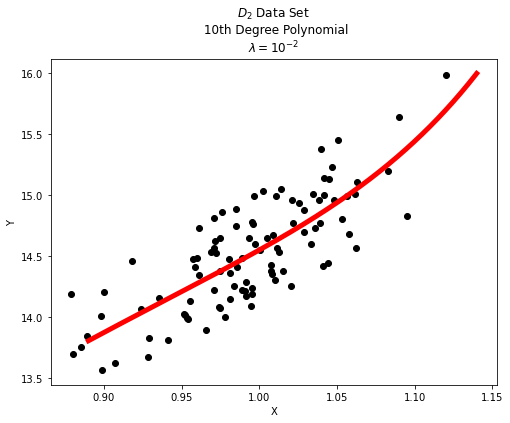

In [136]:
plt.figure(figsize=(8,6)) 
plt.title('$D_2$ Data Set \n 10th Degree Polynomial\n$\lambda=10^{-2}$')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(K,reg_three_list,'red',linewidth=5)
plt.scatter(X, Y, color='black')
plt.show()

### 4. For $\lambda=1$

In [138]:
model_reg_four = make_pipeline(PolynomialFeatures(degree=10), Ridge(alpha=1
                                                                   ,fit_intercept=False),)
model_reg_four = model_reg_four.fit(X, Y)
coeff_ridge_four=(model_reg_four.named_steps['ridge'].coef_)[0]

print(coeff_ridge_four)

[ 4.73243173e+00  3.80152576e+00  2.96679022e+00  2.22038052e+00
  1.55564864e+00  9.67055987e-01  4.50101534e-01  1.26446988e-03
 -3.82039722e-01 -7.01490307e-01 -9.57879989e-01]


In [139]:
def poly_reg_four(x):
    total=0
    for i in range(0,11):
        total = total + coeff_ridge_four[i]*(x**i)
    return total

In [140]:
K=np.arange(0.89,1.13,0.00005)

reg_four_list=[]
for i in K:
    reg_four_list.append(poly_reg_four(i))

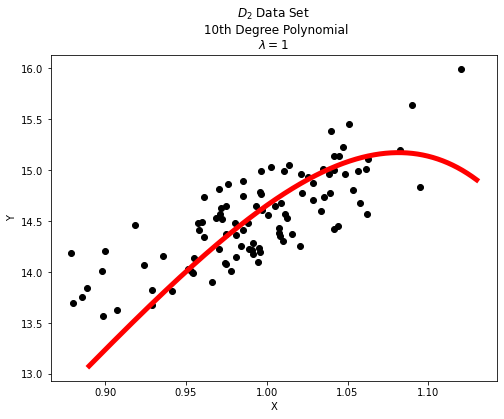

In [141]:
plt.figure(figsize=(8,6)) 
plt.title('$D_2$ Data Set \n 10th Degree Polynomial\n$\lambda=1$')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(K,reg_four_list,'red',linewidth=5)
plt.scatter(X, Y, color='black')
plt.show()

# EXERCISE 2: CONCLUSION

While degree of polynom increases, overfitting arises and RMSE decreases. 
While degree of polynom decreases, underfitting arises and RMSE increases.
While shrinkage increases, curvity of line decreases to decrease overfitting.

# EXERCISE 3: 
# IMPLEMENTING COORDINATE DESCENT

## 0. DATA PRE-PROCESSING

In [142]:
y_wine_quality = np.array(wine_quality['quality']).reshape((1599,1))

In [143]:
x_wine_quality_without_bias = np.array(wine_quality.iloc[:,:-1])

In [144]:
x_wine_quality=np.hstack((x_wine_quality_without_bias,np.ones((1599,1))))

In [145]:
x_wine_quality

array([[ 7.4  ,  0.7  ,  0.   , ...,  0.56 ,  9.4  ,  1.   ],
       [ 7.8  ,  0.88 ,  0.   , ...,  0.68 ,  9.8  ,  1.   ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  0.65 ,  9.8  ,  1.   ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  0.75 , 11.   ,  1.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  0.71 , 10.2  ,  1.   ],
       [ 6.   ,  0.31 ,  0.47 , ...,  0.66 , 11.   ,  1.   ]])

In [146]:
print(y_wine_quality.shape)
print(x_wine_quality.shape)

(1599, 1)
(1599, 12)


## 1. COORDINATE DESCENT

### 1.1 Defining the Functions 

#### 1. g(X,Y,beta,m)

In [147]:
def g_m(X,Y,beta,m):
    d=int(X.shape[0])
    X_m=np.delete(X, m, 1)
    beta_m = np.delete(beta,m,0)
    xm=X[:,m].reshape((d,1))
    return ((Y - (X_m@beta_m)).T @ xm)/(xm.T@xm)

#### 2.f(X,y,beta)

In [148]:
def f(X,Y,beta):
    return(Y-X@beta).T@(Y-X@beta)

#### 3. Minimize Coordinate Descent

In [149]:
def minimize_CD(X,Y,beta_initial,i_max):
    dim = int(beta_initial.shape[0])
    for i in range(0,i_max):
        beta_next=beta_initial
        for m in range(0,dim):
            beta_next[m]=g_m(X,Y,beta_next,m)
    return beta_next

#### 4. Learn-LInreg

In [150]:
def learn_linreg_CD(X,Y,i_max):
    dimension=int(X.shape[1])
    beta_zero = np.zeros((dimension,1))
    beta = minimize_CD(X,Y,beta_zero,i_max)
    return beta
    

### 2. Implementing CD Descent Algorithm

In [151]:
beta_list=[]
for i in range(1,200):
    a=learn_linreg_CD(x_wine_quality,y_wine_quality,i)
    beta_list.append(a)

In [152]:
table=pd.DataFrame(beta_list[0])
for i in range(0,199):
    table=pd.concat([table,pd.DataFrame(beta_list[i])],1)
table_new=pd.DataFrame(np.array(table))
zeros=pd.DataFrame(np.zeros((12,1)))
table_new =pd.concat([zeros,table_new],1)
table_new=pd.DataFrame(np.array(table_new).T)

In [153]:
table_new

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.651442,0.353127,-0.878587,0.064862,0.036232,0.007483,-0.001189,0.035029,0.009209,-0.018283,0.003060,-0.048716
2,0.651442,0.353127,-0.878587,0.064862,0.036232,0.007483,-0.001189,0.035029,0.009209,-0.018283,0.003060,-0.048716
3,0.629664,0.551912,-1.276574,0.090633,0.290524,0.012811,-0.002035,0.084818,0.017292,-0.017735,0.005379,-0.098449
4,0.610298,0.667673,-1.426714,0.097692,0.567653,0.016907,-0.002644,0.145313,0.024719,-0.008906,0.007418,-0.148607
...,...,...,...,...,...,...,...,...,...,...,...,...
196,0.025358,-1.168601,-0.044299,0.010112,-2.009712,0.003896,-0.003365,6.238795,0.186837,1.010956,0.231179,-3.613602
197,0.025475,-1.168745,-0.045901,0.010057,-2.006141,0.003887,-0.003358,6.237894,0.186191,1.010524,0.231826,-3.617832
198,0.025592,-1.168874,-0.047483,0.010003,-2.002568,0.003879,-0.003351,6.236979,0.185545,1.010083,0.232468,-3.622008
199,0.025709,-1.168989,-0.049048,0.009949,-1.998994,0.003870,-0.003344,6.236051,0.184899,1.009636,0.233105,-3.626129


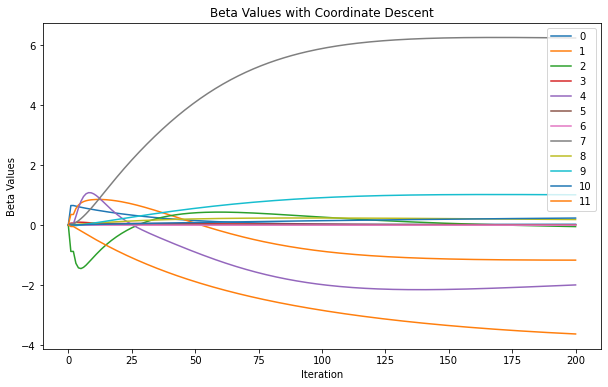

In [154]:
table_new.plot(title='Beta Values with Coordinate Descent',figsize=(10,6))
plt.legend(table_new, loc='upper right')
plt.xlabel('Iteration')
plt.ylabel('Beta Values')
plt.show()

## 2. COORDINATE DESCENT WITH L1

### 1. Defining the Functions

#### 1. Soft Function

In [174]:
def soft(x,e):
    if x>e:
        result=x-e
    elif x<-e:
        result=x+e
    elif abs(x)<=e:
        result=0
    return result
        

#### 2. Regularization Part

In [175]:
def reg_part(X,lamba,m):
    d=int(X.shape[0])
    xm=X[:,m].reshape((d,1))
    return lamba/(xm.T@xm)

#### 3. Function g(X,Y,beta,lamba)

In [176]:
def g_regularized(X,Y,beta,m,lamba):
    d=int(X.shape[0])
    X_m=np.delete(X, m, 1)
    beta_m = np.delete(beta,m,0)
    xm=X[:,m].reshape((d,1))
    value_one =((Y - (X_m@beta_m)).T @ xm)/(xm.T@xm)
    value_two =reg_part(X,lamba,m)
    return soft(value_one,value_two)

#### Minimize CD with Regularization

In [177]:
def reg_minimize_CD(X,Y,beta_initial,lamba,i_max):
    dim = int(beta_initial.shape[0])
    for i in range(0,i_max):
        beta_next=beta_initial
        for m in range(0,dim):
            beta_next[m]=g_regularized(X,Y,beta_initial,m,lamba)
    return beta_next

#### 3. Coordinate Descent with Regularization

In [178]:
def reg_learn_linreg_CD(X,Y,lamba,i_max):
    dimension=int(X.shape[1])
    beta_zero = np.zeros((dimension,1))
    beta = reg_minimize_CD(X,Y,beta_zero,lamba,i_max)
    return beta
    

### 2. Implementing CD Descent with Regularization Algorithm

In [199]:
reg_cd=[]
for l in range(1,100):
    b=reg_learn_linreg_CD(x_wine_quality,y_wine_quality,50,l)
    reg_cd.append(b)

In [200]:
reg_table=pd.DataFrame(reg_cd[0])
for i in range(0,99):
    reg_table=pd.concat([reg_table,pd.DataFrame(reg_cd[i])],1)

In [201]:
table_reg=pd.DataFrame(np.array(reg_table))
zeros=pd.DataFrame(np.zeros((12,1)))
table_reg =pd.concat([zeros,table_reg],1)
table_reg=pd.DataFrame(np.array(table_reg).T)

In [202]:
table_reg

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.651009,0.258472,-0.482912,0.043169,0.0,0.007891,-0.001187,0.001537,0.016414,0.000000,0.002240,-0.013383
2,0.651009,0.258472,-0.482912,0.043169,0.0,0.007891,-0.001187,0.001537,0.016414,0.000000,0.002240,-0.013383
3,0.623972,0.410961,-0.649446,0.059744,0.0,0.014270,-0.002025,0.022546,0.031911,0.000000,0.004773,-0.026868
4,0.598913,0.504592,-0.651575,0.063107,0.0,0.019194,-0.002615,0.058833,0.046809,0.000000,0.007460,-0.040028
...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.054008,-0.551645,0.000000,0.000000,0.0,0.003958,-0.003439,0.613758,0.711627,0.201223,0.237807,0.000000
97,0.054480,-0.550721,0.000000,0.000000,0.0,0.003920,-0.003420,0.573177,0.716515,0.201619,0.239637,0.000000
98,0.054972,-0.549615,0.000000,0.000000,0.0,0.003884,-0.003400,0.532496,0.721396,0.201977,0.241454,0.000000
99,0.055485,-0.548333,0.000000,0.000000,0.0,0.003851,-0.003381,0.491725,0.726268,0.202299,0.243257,0.000000


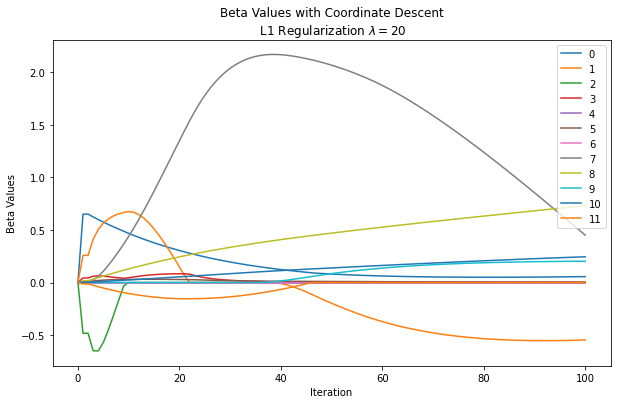

In [206]:
table_reg.plot(title='Beta Values with Coordinate Descent\n L1 Regularization $\lambda =20$',figsize=(10,6))
plt.legend(A, loc='upper right')
plt.xlabel('Iteration')
plt.ylabel('Beta Values')
plt.show()

# EXERCISE 3: CONCLUSION

Betas of non regularized model is greater than regularized one.
Regularization forces to Betas to be zero to overcome overfitting.